In [ ]:
import yfinance as yf    #for downloding the dataset by yahoo finance

In [ ]:
sp500= yf.Ticker("^GSPC")   #ticker enable to download history wuth the symbol GSPC which is sp500 index

In [ ]:
sp500 = sp500.history(period="max")  # Get historical data from the ticker (returns a DataFrame)

In [ ]:
sp500   # pandas dataframe

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-07 00:00:00-04:00,6259.040039,6262.069824,6201.000000,6229.979980,5236740000,0.0,0.0
2025-07-08 00:00:00-04:00,6234.029785,6242.700195,6217.750000,6225.520020,5739030000,0.0,0.0
2025-07-09 00:00:00-04:00,6243.330078,6269.160156,6231.430176,6263.259766,4813340000,0.0,0.0


In [ ]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-06-27 00:00:00-04:00', '2025-06-30 00:00:00-04:00',
               '2025-07-01 00:00:00-04:00', '2025-07-02 00:00:00-04:00',
               '2025-07-03 00:00:00-04:00', '2025-07-07 00:00:00-04:00',
               '2025-07-08 00:00:00-04:00', '2025-07-09 00:00:00-04:00',
               '2025-07-10 00:00:00-04:00', '2025-07-11 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24497, freq=None)

CLEANING AND VISUALIZING OUR STOCK MARKET DATA

<Axes: xlabel='Date'>

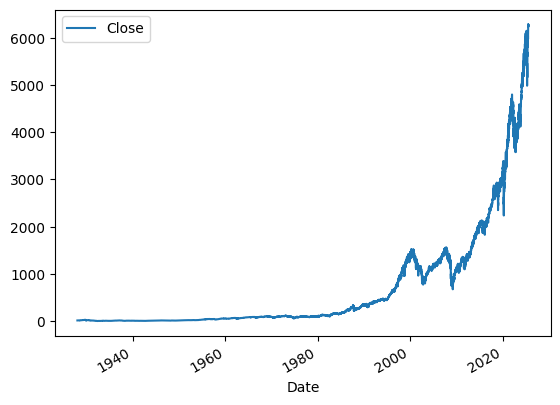

In [ ]:
sp500.plot.line(y="Close", use_index=True)

In [ ]:
del sp500['Dividends']
del sp500['Stock Splits']

In [ ]:
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


SETTING UP OUR TARGET FOR MACHINE LEARNING

WILL THW PRICE GO UP OR DOWN

In [ ]:
sp500['Tomorrow']=sp500['Close'].shift(-1)     #tomorrow price is next day close price

In [ ]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000


In [ ]:
sp500['Target']= (sp500['Tomorrow'] > sp500['Close']).astype(int)   # to see if todays close price is greater than tomorrow price

In [ ]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0


In [ ]:
sp500.index = sp500.index.tz_localize(None)
sp500 = sp500.loc["1990-01-01":].copy()

In [ ]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


TRAINING THE INITIAL MODEL TRAINING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
# 1. n_estimators is the no of individual tress the higher they are the higher accuracy
# 2. min_samples_split protecting frpm overfitting
# 3. random state if run the model twice then the sequence will be predictable

#SPLITTING THE TEST AND TRAIN DATA
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']   #inputs
model.fit(train[predictors], train['Target'])   #train the model with inputs and output as target is output



RandomForestClassifier(min_samples_split=100, random_state=1)

to measure the accuracy

In [ ]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [ ]:
import pandas as pd
preds= pd.Series(preds,index=test.index)  # givesan numpy array of targets of the 100

In [ ]:
precision_score(test['Target'], preds)

0.5657894736842105

In [ ]:
combined=pd.concat([test['Target'], preds], axis=1)

<Axes: xlabel='Date'>

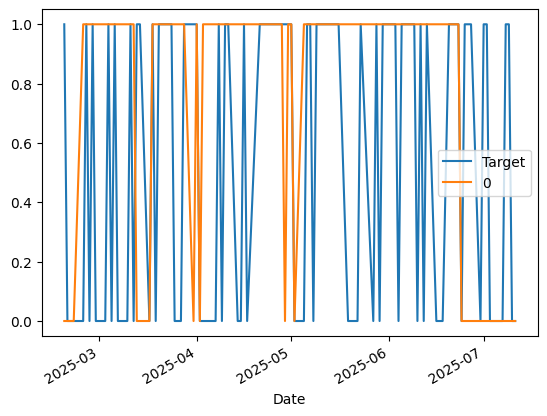

In [ ]:
combined.plot()

BUILDING THE BACKTESTING MODEL

TEST MODEL FOR MULTIPLE YEARS

In [ ]:
#predicted the error
def predict(train,test,predictors,model):
  model.fit(train[predictors],train['Target'])
  preds=model.predict(test[predictors])
  preds= pd.Series(preds,index=test.index, name='Predictions')
  combined=pd.concat([test['Target'], preds], axis=1)
  return combined


In [ ]:
#backtest the error and trying to make them right
def backTest(data,model, predictors, start=2500, step=250):
  all_predictions=[]

  for i in range(start,data.shape[0], step):   #predict data year by year
     train= data.iloc[0:i].copy()   #data of the past year
     test= data.iloc[i:(i+step)].copy()   #data of past data to present year
     predictions= predict(train,test,predictors,model)
     all_predictions.append(predictions)
  return pd.concat(all_predictions)


In [ ]:
predictions= backTest(sp500, model, predictors)  #predictors are the inputs

In [ ]:
predictions['Predictions'].value_counts()

,count
Predictions,
0,3782
1,2665


In [ ]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5298311444652908

In [ ]:
predictions['Target'].value_counts()/predictions.shape[0]

,count
Target,
1,0.536529
0,0.463471


ADDING ADDITIONAL PREDICTORS TO OUR MODEL

In [ ]:
horizons = [2, 5, 60, 250, 1000]  # Different time horizons (e.g., 2-day, 5-day, etc.)
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()  # Rolling average of past 'horizon' days

    ratio_column = f'Close_Ratio_{horizon}'  # e.g., "Close_Ratio_5"

   #ratio column
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close']  # Current price / rolling avg
    #the ratio This helps you identify if the stock is trading above or below trend

   #trend column
    trend_column = f'Trend_{horizon}'

    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']  # Trend indicator  This trend feature helps your model understand short-term momentum.

    new_predictors += [ratio_column, trend_column]


In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07,6259.040039,6262.069824,6201.000000,6229.979980,5236740000,6225.520020,0,0.996053,1.0,1.000327,3.0,1.072585,38.0,1.078033,142.0,1.311946,529.0
2025-07-08,6234.029785,6242.700195,6217.750000,6225.520020,5739030000,6263.259766,1,0.999642,0.0,0.998951,2.0,1.069458,37.0,1.076775,141.0,1.310495,529.0
2025-07-09,6243.330078,6269.160156,6231.430176,6263.259766,4813340000,6280.459961,1,1.003022,1.0,1.002907,3.0,1.072884,38.0,1.082788,141.0,1.317915,529.0


In [ ]:
sp500= sp500.dropna()

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-03,6246.459961,6284.649902,6246.459961,6279.350098,3378110000,6229.979980,0,1.004152,2.0,1.010100,4.0,1.084967,38.0,1.087075,143.0,1.322857,530.0
2025-07-07,6259.040039,6262.069824,6201.000000,6229.979980,5236740000,6225.520020,0,0.996053,1.0,1.000327,3.0,1.072585,38.0,1.078033,142.0,1.311946,529.0
2025-07-08,6234.029785,6242.700195,6217.750000,6225.520020,5739030000,6263.259766,1,0.999642,0.0,0.998951,2.0,1.069458,37.0,1.076775,141.0,1.310495,529.0


IMPROVING OUR MODEL

In [ ]:
model= RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train,test,predictors,model):

  model.fit(train[predictors],train['Target'])

  preds=model.predict_proba(test[predictors])[:,1]   #probability that the row return the zero or 1

  preds[preds>=.6]=1
  preds[preds<.6]=0

  preds= pd.Series(preds,index=test.index, name='Predictions')

  combined=pd.concat([test['Target'], preds], axis=1)

  return combined

In [ ]:
predictions= backTest(sp500,model,new_predictors)

In [ ]:
predictions['Predictions'].value_counts()

,count
Predictions,
0.0,4576
1.0,870


In [ ]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5712643678160919